<a href="https://colab.research.google.com/github/sartajsehgal/FarmLab-Disease-Prediction/blob/main/Rice_Crop_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from PIL import Image
import random

In [3]:
path='/content/drive/MyDrive/Rice Dataset/'
categories=os.listdir(path)
training=[]
categories
for category in categories:
    class_num=categories.index(category)
    for img in os.listdir(path+category):
        if img.endswith('.jpg') or img.endswith('.JPG'):
            img_array=cv2.imread(path+category+'/'+img)
            new_array=cv2.resize(img_array,(64,64))
            training.append([new_array, class_num])
training[0]

[array([[[228, 220, 220],
         [234, 227, 225],
         [231, 223, 223],
         ...,
         [212, 204, 203],
         [218, 204, 205],
         [209, 201, 201]],
 
        [[236, 228, 226],
         [237, 223, 224],
         [238, 225, 219],
         ...,
         [209, 201, 201],
         [213, 205, 205],
         [213, 206, 203]],
 
        [[244, 230, 231],
         [239, 225, 226],
         [239, 225, 226],
         ...,
         [212, 204, 204],
         [214, 200, 201],
         [210, 196, 197]],
 
        ...,
 
        [[249, 242, 241],
         [243, 235, 234],
         [243, 235, 235],
         ...,
         [226, 212, 213],
         [223, 209, 210],
         [224, 210, 211]],
 
        [[245, 237, 237],
         [247, 239, 239],
         [246, 238, 237],
         ...,
         [226, 212, 213],
         [229, 216, 216],
         [228, 214, 215]],
 
        [[247, 239, 239],
         [244, 237, 235],
         [252, 245, 244],
         ...,
         [230, 216, 217],
  

In [4]:
random.shuffle(training)

In [5]:
X=[]
y=[]
for features, label in training:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,64,64,3)

In [6]:
X=X.astype('float32')
X/=255
from keras.utils import np_utils
Y=np_utils.to_categorical(y,7)
print(Y[100])
print(Y.shape)

[0. 0. 0. 0. 0. 1. 0.]
(9237, 7)


In [7]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size = 0.2, random_state = 42)

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3),kernel_regularizer=keras.regularizers.l2(0.05)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.05)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 128)       0

In [12]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
train_ds=tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_ds=tf.data.Dataset.from_tensor_slices((X_valid,y_valid))
test_ds=tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [14]:
history=model.fit(train_ds.batch(128),
         epochs=60,
         validation_data=valid_ds.batch(128))

Epoch 1/60
47/47 [==============================] - 16s 117ms/step - loss: 4.6968 - accuracy: 0.3509 - val_loss: 2.3317 - val_accuracy: 0.4709
Epoch 2/60
47/47 [==============================] - 5s 103ms/step - loss: 1.6948 - accuracy: 0.5466 - val_loss: 1.4474 - val_accuracy: 0.5771
Epoch 3/60
47/47 [==============================] - 5s 103ms/step - loss: 1.2887 - accuracy: 0.5789 - val_loss: 1.2992 - val_accuracy: 0.5575
Epoch 4/60
47/47 [==============================] - 5s 103ms/step - loss: 1.1583 - accuracy: 0.6035 - val_loss: 1.1561 - val_accuracy: 0.5656
Epoch 5/60
47/47 [==============================] - 5s 103ms/step - loss: 1.0915 - accuracy: 0.6251 - val_loss: 1.0987 - val_accuracy: 0.5846
Epoch 6/60
47/47 [==============================] - 5s 103ms/step - loss: 1.0407 - accuracy: 0.6461 - val_loss: 1.0631 - val_accuracy: 0.6191
Epoch 7/60
47/47 [==============================] - 5s 103ms/step - loss: 0.9949 - accuracy: 0.6698 - val_loss: 1.0308 - val_accuracy: 0.6265
Epoch

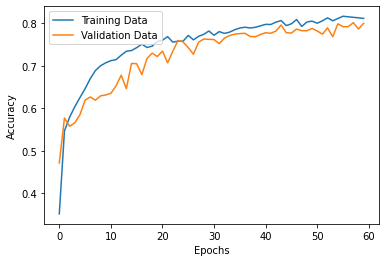

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Data')
plt.plot(history.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [16]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [17]:
model.evaluate(X_test,y_test)

58/58 [==============================] - 1s 14ms/step - loss: 0.5521 - accuracy: 0.8214


[0.5520732998847961, 0.8214285969734192]

In [44]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open('model.tflite','wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp9b5u8t0c/assets


In [18]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 128)      

In [20]:
model1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history1=model1.fit(train_ds.batch(128),
         epochs=60,
         validation_data=valid_ds.batch(128))

Epoch 1/60
47/47 [==============================] - 5s 105ms/step - loss: 1.8705 - accuracy: 0.2521 - val_loss: 1.6058 - val_accuracy: 0.3796
Epoch 2/60
47/47 [==============================] - 5s 102ms/step - loss: 1.1971 - accuracy: 0.5141 - val_loss: 1.0320 - val_accuracy: 0.5731
Epoch 3/60
47/47 [==============================] - 5s 103ms/step - loss: 0.9368 - accuracy: 0.6285 - val_loss: 0.9127 - val_accuracy: 0.6211
Epoch 4/60
47/47 [==============================] - 5s 102ms/step - loss: 0.8272 - accuracy: 0.6735 - val_loss: 0.8842 - val_accuracy: 0.6272
Epoch 5/60
47/47 [==============================] - 5s 102ms/step - loss: 0.7279 - accuracy: 0.7107 - val_loss: 0.8406 - val_accuracy: 0.6360
Epoch 6/60
47/47 [==============================] - 5s 102ms/step - loss: 0.6880 - accuracy: 0.7232 - val_loss: 0.7296 - val_accuracy: 0.7111
Epoch 7/60
47/47 [==============================] - 5s 102ms/step - loss: 0.6471 - accuracy: 0.7364 - val_loss: 0.6671 - val_accuracy: 0.7240
Epoch 

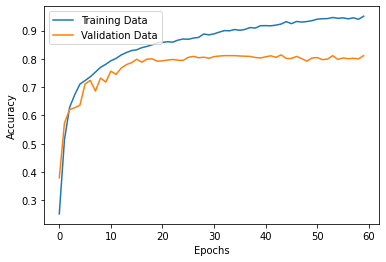

In [22]:
plt.plot(history1.history['accuracy'],label='Training Data')
plt.plot(history1.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [23]:
model1.evaluate(X_test,y_test)

58/58 [==============================] - 1s 12ms/step - loss: 0.7098 - accuracy: 0.8074


[0.7098102569580078, 0.8073592782020569]

In [24]:
model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [25]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 128)      

In [26]:
model2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
history2=model1.fit(train_ds.batch(128),
         epochs=60,
         validation_data=valid_ds.batch(128))

Epoch 1/60
47/47 [==============================] - 5s 102ms/step - loss: 0.1244 - accuracy: 0.9520 - val_loss: 0.7771 - val_accuracy: 0.7997
Epoch 2/60
47/47 [==============================] - 5s 103ms/step - loss: 0.1311 - accuracy: 0.9508 - val_loss: 0.7640 - val_accuracy: 0.8045
Epoch 3/60
47/47 [==============================] - 5s 102ms/step - loss: 0.1226 - accuracy: 0.9535 - val_loss: 0.8076 - val_accuracy: 0.7963
Epoch 4/60
47/47 [==============================] - 5s 103ms/step - loss: 0.0999 - accuracy: 0.9640 - val_loss: 0.8790 - val_accuracy: 0.7970
Epoch 5/60
47/47 [==============================] - 5s 103ms/step - loss: 0.0984 - accuracy: 0.9619 - val_loss: 0.9193 - val_accuracy: 0.7923
Epoch 6/60
47/47 [==============================] - 5s 103ms/step - loss: 0.0958 - accuracy: 0.9655 - val_loss: 0.9195 - val_accuracy: 0.8024
Epoch 7/60
47/47 [==============================] - 5s 103ms/step - loss: 0.1202 - accuracy: 0.9548 - val_loss: 0.9216 - val_accuracy: 0.7943
Epoch 

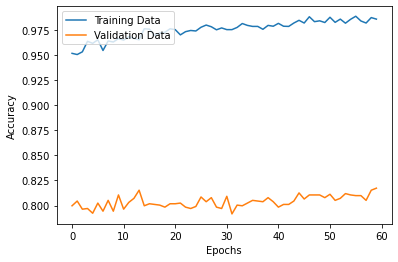

In [28]:
plt.plot(history2.history['accuracy'],label='Training Data')
plt.plot(history2.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [29]:
model2.evaluate(X_test,y_test)

58/58 [==============================] - 1s 11ms/step - loss: 1.9520 - accuracy: 0.1840


[1.951978325843811, 0.18398268520832062]

## Now using the VGG16 model

In [30]:
from tensorflow.keras.utils import to_categorical

vgg_train_X=tf.image.resize(X_train, (150,150))
vgg_valid_X=tf.image.resize(X_valid, (150,150))
vgg_test_X=tf.image.resize(X_test, (150,150))

vgg_train_Y=to_categorical(y_train, num_classes=7)
vgg_valid_Y=to_categorical(y_valid, num_classes=7)
vgg_test_Y=to_categorical(y_test, num_classes=7)

In [31]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model=VGG16(weights="imagenet", include_top=False, input_shape=vgg_train_X[0].shape)
base_model.trainable=False

vgg_train_X=preprocess_input(vgg_train_X)
vgg_valid_X=preprocess_input(vgg_valid_X)
vgg_test_X=preprocess_input(vgg_test_X)

58900480/58889256 [==============================] - 0s 0us/step


In [32]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model_VGG = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [34]:
model_VGG.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [36]:
VGG_train_ds=tf.data.Dataset.from_tensor_slices((vgg_train_X,vgg_train_Y))
VGG_valid_ds=tf.data.Dataset.from_tensor_slices((vgg_valid_X,vgg_valid_Y))
VGG_test_ds=tf.data.Dataset.from_tensor_slices((vgg_test_X,vgg_test_Y))

In [41]:
history_VGG=model_VGG.fit(VGG_train_ds.batch(128),
         epochs=60,
         validation_data=VGG_valid_ds.batch(128)
         )

Epoch 1/60
47/47 [==============================] - 32s 684ms/step - loss: 1.5483 - accuracy: 0.4536 - val_loss: 1.4963 - val_accuracy: 0.5007
Epoch 2/60
47/47 [==============================] - 32s 681ms/step - loss: 1.5117 - accuracy: 0.4723 - val_loss: 1.4837 - val_accuracy: 0.4851
Epoch 3/60
47/47 [==============================] - 32s 683ms/step - loss: 1.4770 - accuracy: 0.4784 - val_loss: 1.4599 - val_accuracy: 0.4858
Epoch 4/60
47/47 [==============================] - 32s 682ms/step - loss: 1.4411 - accuracy: 0.4816 - val_loss: 1.4563 - val_accuracy: 0.5101
Epoch 5/60
47/47 [==============================] - 32s 681ms/step - loss: 1.4184 - accuracy: 0.4852 - val_loss: 1.4074 - val_accuracy: 0.5189
Epoch 6/60
47/47 [==============================] - 32s 683ms/step - loss: 1.3758 - accuracy: 0.5033 - val_loss: 1.3523 - val_accuracy: 0.5237
Epoch 7/60
47/47 [==============================] - 32s 682ms/step - loss: 1.3421 - accuracy: 0.5057 - val_loss: 1.3505 - val_accuracy: 0.5291

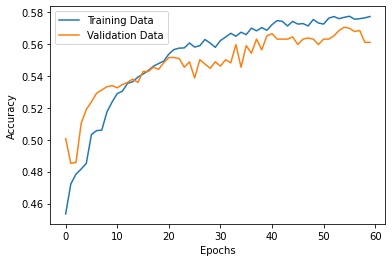

In [42]:
plt.plot(history_VGG.history['accuracy'],label='Training Data')
plt.plot(history_VGG.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [43]:
model_VGG.evaluate(vgg_test_X,vgg_test_Y)

58/58 [==============================] - 9s 156ms/step - loss: 1.1296 - accuracy: 0.5536


[1.12955641746521, 0.5535714030265808]